# Logistic Regression

**Why Use Logostic Regression?**
 - Logistic Regression is used when the response variable is categorical in nature. Here the Dependent variable is binary,that is 0 or 1/ yes or no, Approve/not approved type of outcome.
 
      Linear regression is used when the dependent variable (outcome) is continuous.Example - predicting height with varables such as age, weight,sex ect 


For simplicity and as a beginner I used a "semi-cleaned" version of the titanic data set from Kaggle.

**The objective of this analysis is to predict a classification - survival or deceased.**


**VARIABLE DESCRIPTIONS:**
- Survived: Survival (0 = No; 1 = Yes)
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name: Name
- Sex: Sex
- Age: Age
- SibSp: Number of Siblings/Spouses Aboard
- Parch: Number of Parents/Children Aboard
- Ticket: Ticket Number
- Fare: Passenger Fare
- Cabin: Cabin
- Embarked: Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
titanic = pd.read_csv('titanic_data.csv')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Missing Data

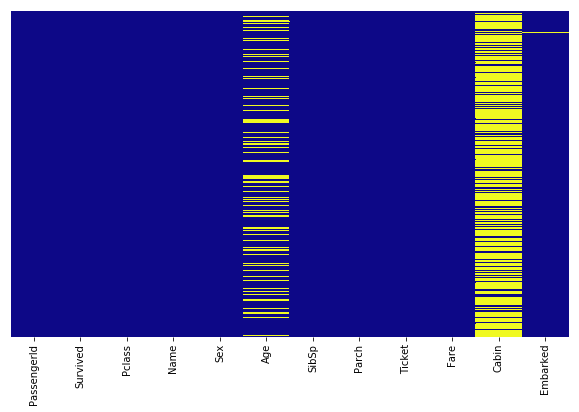

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='plasma')

- The Missing values in Age is minimal when compared with the cabin variable.

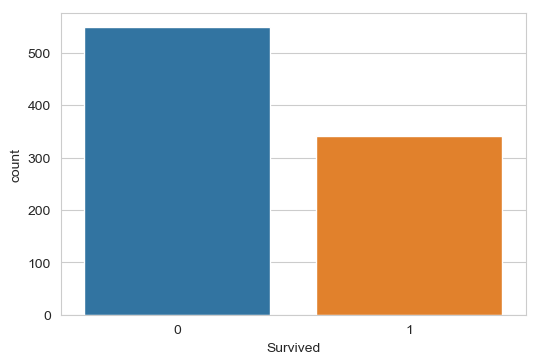

In [22]:
plt.figure(dpi=100)
sns.countplot(x='Survived',data=titanic)

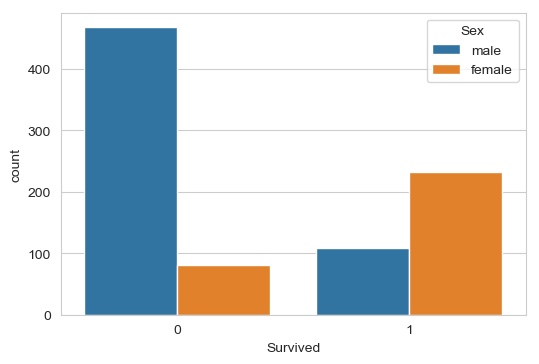

In [20]:
plt.figure(dpi=100)
sns.countplot(x='Survived',hue='Sex',data=titanic)

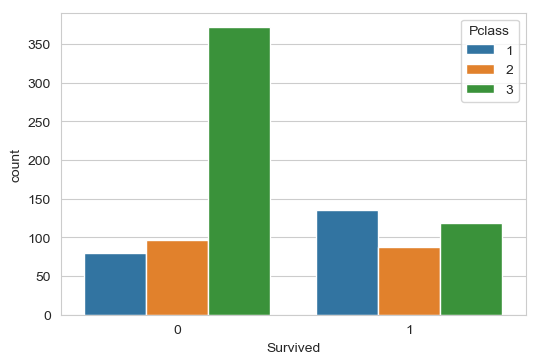

In [24]:
plt.figure(dpi=100)
sns.countplot(x='Survived',hue='Pclass',data=titanic)

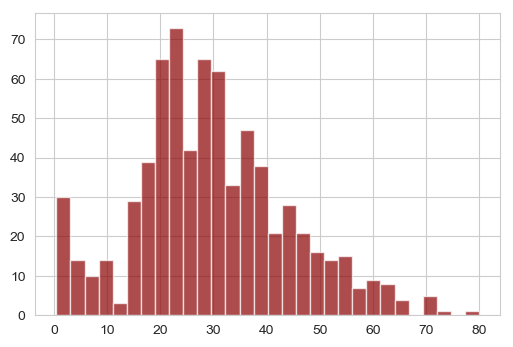

In [26]:
plt.figure(dpi=100)
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7)

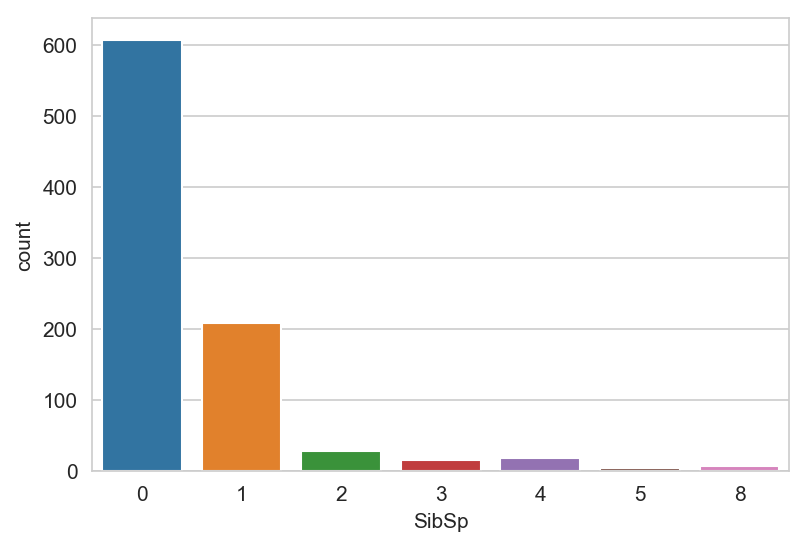

In [29]:
plt.figure(dpi=150)
sns.countplot(x='SibSp',data=titanic)

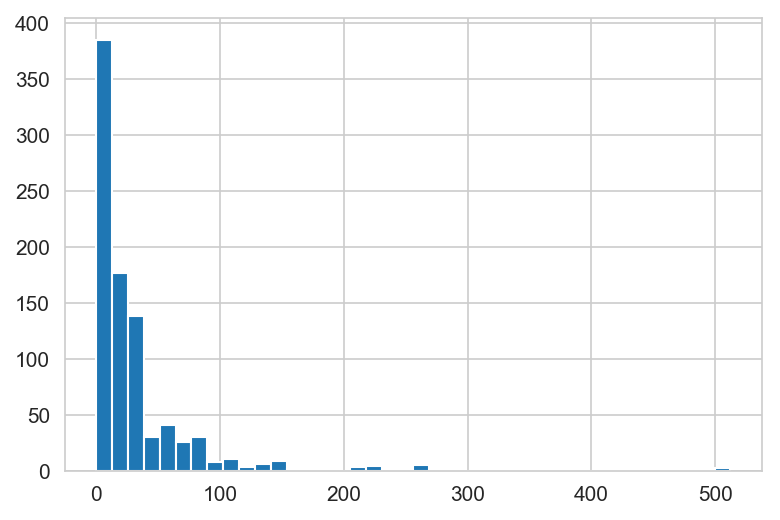

In [32]:
plt.figure(dpi=150)
titanic['Fare'].hist(bins=40)

## Data Cleaning
We want to fill in missing age data instead of dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can also check the average age by passenger class.

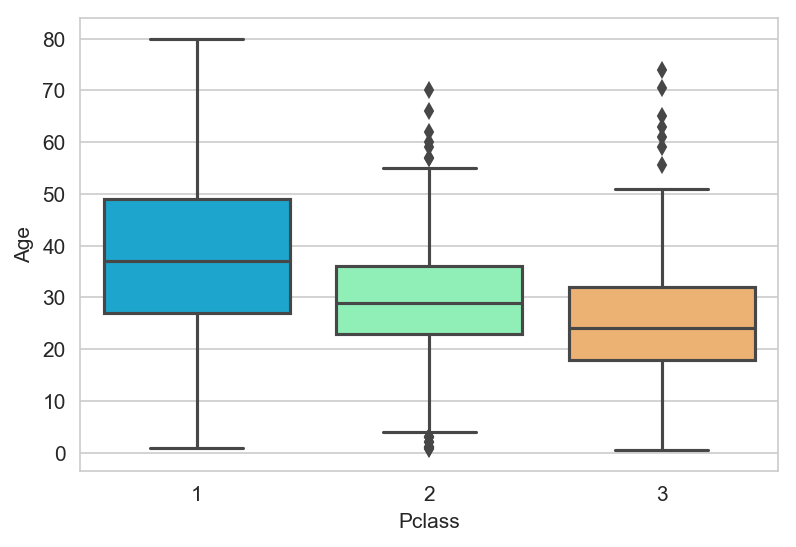

In [39]:
plt.figure(dpi=150)
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow')

- We can observe that passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to fill the Nan values based on Pclass.

In [41]:
def average_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [43]:
titanic['Age'] = titanic[['Age','Pclass']].apply(average_age,axis=1)

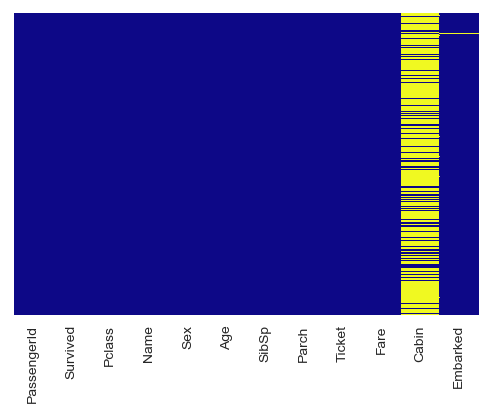

In [46]:
plt.figure(dpi=100)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='plasma')

- Drop the Cabin column and the row in Embarked that is NaN.

In [47]:
titanic.drop('Cabin',axis=1,inplace=True)

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
titanic.dropna(inplace=True)

## Converting Categorical Values

Its essential to convert categorical features to dummy variables using pandas. The machine learning algorithm won't be able to directly take in those features as inputs.

In [50]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [53]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [54]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression model

Splitting our data into a training set and test set.

## Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [60]:
from sklearn.linear_model import LogisticRegression

In [73]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = log.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



- The model here has a precision rate of 82% success. 

In [70]:
from sklearn import metrics

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1797752808988764
MSE: 0.1797752808988764
RMSE: 0.423999152002544
